<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2021_day_1/blob/main/CNN/Worshop_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

In [ ]:
import numpy as np
from scipy import signal
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, MaxPooling1D, Activation, Flatten, Conv2D, MaxPool2D

from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import os
import pickle

import pydot 
import graphviz

# MNIST data loading 


In [ ]:
# loading data
#https://en.wikipedia.org/wiki/MNIST_database
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# data view
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(x_train[0],cmap=plt.cm.gray)
plt.show()
print(y_train[0])

In [ ]:
# train data 
x_train.shape

In [ ]:
# test data 
x_test.shape

# Convolutional Operation

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 1, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
    filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 0, 1],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 1., 0.],[0, 0, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[10]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[-1., -1., -1.],[-1., 8., -1.],[-1., -1., -1.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
# for i in range(0,2):
#     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

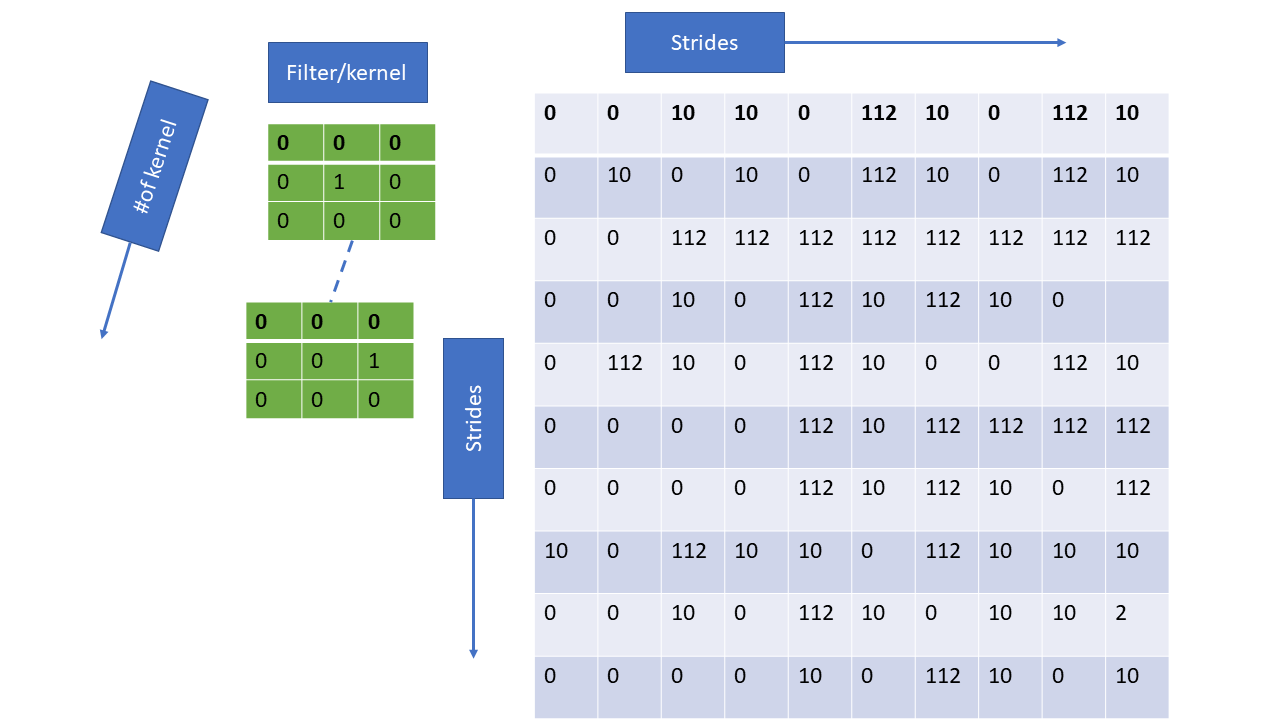

#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    activation=None,
    )

filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution). 

kernel_size:An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions. 

strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input. 

activation:	Activation function to use. If you don't specify anything, no activation is applied (see keras.activations). 

outputs is Shrinking 
Loosing information on corners of the image

Second method: (((W - K + 2P)/S) + 1)
        Here W = Input size
        K = Filter size
        S = Stride
        P = Padding 

        inpput_size - (filter_size - 1)

# Data pre-process

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#-1 means that the length in that dimension is inferred.

In [ ]:
x_train.shape

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
y_train_cat.shape

In [ ]:
len(np.unique(y_train))

# Create a Sequential Model

In [ ]:
model_sq = Sequential()

model_sq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Conv2D(64, (3, 3), activation='relu'))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Flatten())

model_sq.add(Dense(128, activation='relu'))

model_sq.add(Dense(10, activation='softmax'))

model_sq.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

What we ceated

In [ ]:
model_sq.summary()

In [ ]:

tf.keras.utils.plot_model(model_sq, "my_first_model.png")

In [ ]:
#Train the model.model

In [ ]:
model_sq_history = model_sq.fit(x_train, y_train_cat, batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

In [ ]:
def layer_visualizer(layer_name):
  
  layer_output=model_sq.get_layer(layer_name).output

  intermediate_model=tf.keras.models.Model(inputs=model_sq.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(x_train[0].reshape(1,28,28,1))
  
  row_size=8#4
  col_size=int(np.floor((np.shape(intermediate_prediction)[3])/row_size))
  
  img_index=0

  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1

In [ ]:
layer_visualizer('conv2d')

In [ ]:
layer_visualizer('conv2d_1')

In [ ]:
plt.plot(model_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq.evaluate(x_test,  y_test_cat)
print(test_acc)

In [ ]:
y_pred = model_sq.predict(x_test)

In [ ]:
print(y_pred)

In [ ]:
y_pred_number=np.argmax(y_pred,axis=1)
print(y_pred_number)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(y_test_cat,axis=1), np.argmax(y_pred,axis=1))

In [ ]:
print(cf_matrix)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]
model_sq_history=model_sq.fit(
    x_train, 
    y_train_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.3,
)

In [ ]:
y_pred = model_sq.predict(x_test)
cf_matrix = confusion_matrix(np.argmax(y_test_cat,axis=1), np.argmax(y_pred,axis=1))
plt.plot(model_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq.evaluate(x_test,  y_test_cat)
print(test_acc)
print(cf_matrix)

In [ ]:
#save and load models
#https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model
model_sq.save('model')
loaded_model = tf.keras.models.load_model('model')


# Create a Non Sequential Model (Functional Api)

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1))

x=Conv2D(32, (3, 3), activation='relu')(inputs)
x=MaxPool2D(pool_size=(2, 2)) (x)

x1=Conv2D(64, (3, 3), activation='relu')(x)
x1=MaxPool2D(pool_size=(2, 2))(x1)

y1=Conv2D(64, (3, 3), activation='relu')(x1)
y1=MaxPool2D(pool_size=(2, 2))(y1)

y1=Flatten()(y1)

z=Dense(128, activation='relu')(y1)

outputs=Dense(10, activation='softmax')(z)


model_non_sq = tf.keras.Model(inputs=inputs, outputs=outputs)
model_non_sq.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
              
tf.keras.utils.plot_model(model_non_sq, "my_first_model.png")


In [ ]:
model_non_sq_history=model_non_sq.fit(
    x_train, 
    y_train_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.3,
)

In [ ]:
plt.plot(model_non_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_non_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_non_sq.evaluate(x_test,  y_test_cat)
print(test_acc)

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1))

x=Conv2D(32, (3, 3), activation='relu')(inputs)
x=MaxPool2D(pool_size=(2, 2)) (x)

x1=Conv2D(64, (3, 3), activation='relu')(x)
x1=MaxPool2D(pool_size=(2, 2))(x1)

y1=Conv2D(64, (3, 3), activation='relu')(x)
y1=MaxPool2D(pool_size=(2, 2))(y1)

z=tf.keras.layers.Concatenate(axis=1)([x1, y1])

z=Flatten()(z)

z=Dense(128, activation='relu')(z)

outputs=Dense(10, activation='softmax')(z)


model_non_sq_v2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model_non_sq_v2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model_non_sq_v2.summary()

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_non_sq_v2_history=model_non_sq_v2.fit(
    x_train,
    y_train_cat,
    epochs=5,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

In [ ]:
tf.keras.utils.plot_model(model_non_sq_v2, "model_non_sq.png")

In [ ]:
plt.plot(model_non_sq_v2_history.history['accuracy'], label='accuracy')
plt.plot(model_non_sq_v2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_non_sq_v2.evaluate(x_test,  y_test_cat)
y_test_pred = model_non_sq_v2.predict(x_test)
print(test_acc)

#  Color dataset cifar10

In [ ]:
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = tf.keras.datasets.cifar10.load_data()

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train_cifar10[i])
# show the figure
plt.show()

In [ ]:
x_train_cifar10.shape

In [ ]:
plt.imshow(x_train_cifar10[0])
plt.show()

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/image/resize
train_resized_2828=tf.image.resize(x_train_cifar10,[28,28], method='nearest')
test_resized_2828=tf.image.resize(x_test_cifar10,[28,28], method='nearest')
y_train_cifar10_cat = to_categorical(y_train_cifar10, 10)
y_test_cifar10_cat = to_categorical(y_test_cifar10, 10)

In [ ]:
model_sq_3ch = Sequential()

model_sq_3ch.add(Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(28, 28, 3)))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Conv2D(124, (3, 3), padding="same", activation='relu'))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Flatten())

model_sq_3ch.add(Dense(128, activation='relu'))

model_sq_3ch.add(Dense(10, activation='softmax'))

model_sq_3ch.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_sq_3ch_history=model_sq_3ch.fit(
    train_resized_2828,
    y_train_cifar10_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

In [ ]:
plt.plot(model_sq_3ch_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_3ch_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq_3ch.evaluate(test_resized_2828,  y_test_cifar10_cat)
y_test_pred = model_sq_3ch.predict(test_resized_2828)
print(test_acc)



In [ ]:
grayscaled_train_2828 = tf.image.rgb_to_grayscale(train_resized_2828)
grayscaled_test_2828 = tf.image.rgb_to_grayscale(test_resized_2828)


In [ ]:
model_sq_1ch = Sequential()

model_sq_1ch.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Conv2D(124, (3, 3), padding="same", activation='relu'))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Flatten())

model_sq_1ch.add(Dense(128, activation='relu'))

model_sq_1ch.add(Dense(10, activation='softmax'))

model_sq_1ch.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_sq_1ch_history=model_sq_1ch.fit(
    grayscaled_train_2828,
    y_train_cifar10_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

In [ ]:
plt.plot(model_sq_1ch_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_1ch_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq_1ch.evaluate(grayscaled_test_2828,  y_test_cifar10_cat)
y_test_pred = model_sq_1ch.predict(grayscaled_test_2828)
print(test_acc)



#Transfer learning

In [ ]:
print(model_non_sq.layers[-1].name)

In [ ]:
layer = tf.keras.layers.BatchNormalization()
print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))


In [ ]:
for layer_number in range (0,len(model_sq.layers)-3):
    model_sq.layers[layer_number].trainable = False
    print('Layer ' +  model_sq.layers[layer_number].name + ' frozen.')

In [ ]:
flat1 = Flatten()(model_sq.layers[-1].output)
class1 = Dense(124, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model_transfer = tf.keras.Model(inputs=model_sq.inputs, outputs=output)

In [ ]:
model_transfer.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=10,
        verbose=1,
    )
]

model_transfer_history=model_transfer.fit(
    x_train, 
    y_train_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

In [ ]:
plt.plot(model_transfer_history.history['accuracy'], label='accuracy')
plt.plot(model_transfer_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_transfer.evaluate(x_test,  y_test_cat)
y_test_pred = model_transfer.predict(x_test)
print(test_acc)



# 1 D CNN

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/XTest_trans.csv")
x_test_Spo2= df.to_numpy()

In [ ]:
x_test_Spo2.shape

In [ ]:
# plotting
plt.title("Data")
plt.xlabel("Samples")
plt.ylabel("SpO2")
plt.plot(x_test_Spo2[0][0:3000])
plt.show()

In [ ]:
x_test_Spo2 = np.expand_dims(x_test_Spo2, axis = 2)

In [ ]:
x_test_Spo2.shape

In [ ]:
df_train_x = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/X_train_trans.csv")
x_train_Spo2 = df_train_x.to_numpy()
x_train_Spo2 = np.expand_dims(x_train_Spo2, axis = 2)
df_ytest = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/test_y_hot.csv")
y_test_Spo2= df_ytest.to_numpy()
df_ytrain = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/train_y_hot.csv")
y_train_Spo2= df_ytrain.to_numpy()

In [ ]:
#create model
model_conv1 = tf.keras.Sequential()

#get number of columns in training data
n_cols_2 = x_train_Spo2.shape[1]
print("------>", str(n_cols_2))


#add layers to model
model_conv1.add(Conv1D(15, 9, strides=5, padding='same', input_shape=(3000,1))) #Conv_1
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(MaxPooling1D(pool_size=5, strides=5, padding='same')) #MaxP_1
model_conv1.add(Conv1D(12, 8, strides=3, padding='same'))   #Conv_2
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(Conv1D(8, 8, strides=3, padding='same'))    #Conv_3
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(Conv1D(13, 4, strides=2, padding='same'))   #Conv_4
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(Flatten())
model_conv1.add(Dense(117)) #20-200
model_conv1.add(Dense(2, activation='softmax'))

In [ ]:
model_conv1.compile(loss='binary_crossentropy',
                  optimizer='adam',metrics=['accuracy'])
                  #metrics=[tf.keras.metrics.Accuracy()])
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

model_conv1.summary()

In [ ]:
model_conv1_history=model_conv1.fit(
    x_train_Spo2, 
    y_train_Spo2,
    epochs=20,
    batch_size=64,
    validation_split=0.3,
)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_conv1_history=model_conv1.fit(
    x_train_Spo2, 
    y_train_Spo2,
    epochs=200,
    batch_size=128,
    callbacks=callbacks,
    validation_split=0.3,
)

In [ ]:
plt.plot(model_conv1_history.history['accuracy'], label='accuracy')
plt.plot(model_conv1_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_conv1.evaluate(x_test_Spo2,  y_test_Spo2)
y_test_pred = model_conv1.predict(x_test_Spo2)
print(test_acc)

In [ ]:
import seaborn as sn
columns = range(0,2)
confm = confusion_matrix(np.argmax(y_test_Spo2,axis=1),np.argmax(y_test_pred,axis=1))
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Oranges', annot=True) 